#  Corona vaccine progress 
version 0.91 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2021-01-14 13:04:38.050833


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Argentina,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...
1,Austria,AUT,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://info.gesundheitsministerium.gv.at/data...
2,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",2021-01-13,Ministry of Health,https://twitter.com/MOH_Bahrain/status/1349446...
3,Belgium,BEL,Pfizer/BioNTech,2021-01-13,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en
4,Bulgaria,BGR,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://coronavirus.bg/bg/statistika
5,Canada,CAN,"Moderna, Pfizer/BioNTech",2021-01-13,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada
6,Chile,CHL,Pfizer/BioNTech,2021-01-06,Department of Statistics and Health Information,https://informesdeis.minsal.cl/SASVisualAnalyt...
7,China,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...
8,Costa Rica,CRI,Pfizer/BioNTech,2021-01-08,National Health Commission,https://www.ccss.sa.cr/noticias/servicios_noti...
9,Croatia,HRV,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...


In [5]:
#order by last updated ascending
countries_csv = countries_csv.sort_values(by=['last_observation_date'],ascending=False)
#countries_csv.reindex(["location"])
countries_csv.reset_index(drop=True, inplace=True)
countries_csv

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Israel,ISR,Pfizer/BioNTech,2021-01-14,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
1,Turkey,TUR,Sinopharm,2021-01-14,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/
2,Estonia,EST,Pfizer/BioNTech,2021-01-14,National Health Board,https://www.terviseamet.ee/et/uudised
3,Argentina,ARG,Sputnik V,2021-01-13,Government of Argentina,https://www.argentina.gob.ar/noticias/continua...
4,Slovenia,SVN,Pfizer/BioNTech,2021-01-13,"National Institute of Public Health, via Sledi...",https://covid-19.sledilnik.org/en/
5,Mexico,MEX,Pfizer/BioNTech,2021-01-13,Secretary of Health,https://www.gob.mx/salud/prensa/015-vacunacion...
6,Oman,OMN,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/OmaniMOH/status/1349582771...
7,Poland,POL,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://twitter.com/szczepimysie/status/134964...
8,Lithuania,LTU,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
9,Latvia,LVA,Pfizer/BioNTech,2021-01-13,National Health Service,http://www.vmnvd.gov.lv/lv/covid-19/1486-vakci...


## Latest reported

In [6]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:20]

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,iso_code,vaccines,last_observation_date,source_name,source_website,_merge
443,Turkey,2021-01-14,Sinopharm,https://covid19asi.saglik.gov.tr/,157451,157451.0,0,TUR,Sinopharm,2021-01-14,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/,both
152,Estonia,2021-01-14,Pfizer/BioNTech,https://www.terviseamet.ee/et/uudised/covid-19...,14879,14879.0,0,EST,Pfizer/BioNTech,2021-01-14,National Health Board,https://www.terviseamet.ee/et/uudised,both
250,Israel,2021-01-14,Pfizer/BioNTech,https://datadashboard.health.gov.il/COVID-19/g...,2047880,1937552.0,110328,ISR,Pfizer/BioNTech,2021-01-14,Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...,both
439,Spain,2021-01-13,Pfizer/BioNTech,https://www.mscbs.gob.es/profesionales/saludPu...,581638,581638.0,0,ESP,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://www.mscbs.gob.es/profesionales/saludPu...,both
97,China,2021-01-13,"CNBG, Sinovac",https://www.chinadaily.com.cn/a/202101/13/WS5f...,10000000,10000000.0,0,CHN,"CNBG, Sinovac",2021-01-13,National Health Commission,https://www.chinadaily.com.cn/a/202101/13/WS5f...,both
204,Greece,2021-01-13,Pfizer/BioNTech,https://www.data.gov.gr/datasets/mdg_emvolio/,64588,64588.0,0,GRC,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://www.data.gov.gr/datasets/mdg_emvolio/,both
107,Croatia,2021-01-13,Pfizer/BioNTech,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...,34553,34553.0,0,HRV,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://vlada.gov.hr/vijesti/nove-mjere-za-ula...,both
451,United Arab Emirates,2021-01-13,"Pfizer/BioNTech, Sinopharm",https://twitter.com/NCEMAUAE/status/1349326115...,1394580,1144580.0,250000,ARE,"Pfizer/BioNTech, Sinopharm",2021-01-13,National Emergency Crisis and Disaster Managem...,https://twitter.com/NCEMAUAE,both
44,Belgium,2021-01-13,Pfizer/BioNTech,https://covid-vaccinatie.be/en,55740,55740.0,0,BEL,Pfizer/BioNTech,2021-01-13,Regional governments via covid-vaccinatie.be,https://covid-vaccinatie.be/en,both
112,Czechia,2021-01-13,Pfizer/BioNTech,https://onemocneni-aktualne.mzcr.cz/covid-19,70680,70680.0,0,CZE,Pfizer/BioNTech,2021-01-13,Ministry of Health,https://onemocneni-aktualne.mzcr.cz/covid-19,both


In [7]:
#Countries in list
allCountries["location"].value_counts()

Canada                  31
Israel                  27
Bahrain                 22
Italy                   18
Romania                 17
Greece                  17
Germany                 17
Denmark                 17
Estonia                 17
Poland                  16
Oman                    16
Lithuania               15
Mexico                  15
United States           15
Norway                  14
Hungary                 13
Latvia                  13
Slovenia                11
Bulgaria                11
Belgium                 10
Netherlands              8
Finland                  8
United Arab Emirates     8
Austria                  8
Croatia                  7
Scotland                 7
France                   7
Wales                    7
Chile                    7
Northern Ireland         7
Spain                    7
United Kingdom           6
Portugal                 6
Slovakia                 6
England                  6
Argentina                5
China                    4
I

In [8]:
allCountries.groupby(["location", "vaccine"]).size()

location        vaccine                            
Argentina       Sputnik V                               5
Austria         Pfizer/BioNTech                         8
Bahrain         Pfizer/BioNTech, Sinopharm             22
Belgium         Pfizer/BioNTech                        10
Bulgaria        Pfizer/BioNTech                        11
                                                       ..
United Kingdom  Pfizer/BioNTech                         3
United States   Moderna, Pfizer/BioNTech               13
                Pfizer/BioNTech                         2
Wales           Oxford/AstraZeneca, Pfizer/BioNTech     3
                Pfizer/BioNTech                         4
Length: 61, dtype: int64

In [9]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 472
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 453 non-null    object        
 1   date                     453 non-null    datetime64[ns]
 2   vaccine                  453 non-null    object        
 3   source_url               453 non-null    object        
 4   total_vaccinations       453 non-null    int64         
 5   people_vaccinated        449 non-null    float64       
 6   people_fully_vaccinated  453 non-null    int64         
 7   iso_code                 453 non-null    object        
 8   vaccines                 453 non-null    object        
 9   last_observation_date    453 non-null    object        
 10  source_name              453 non-null    object        
 11  source_website           453 non-null    object        
 12  _merge                   453 non-nul

In [10]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


32 810 492 (49, 3)


## Charts

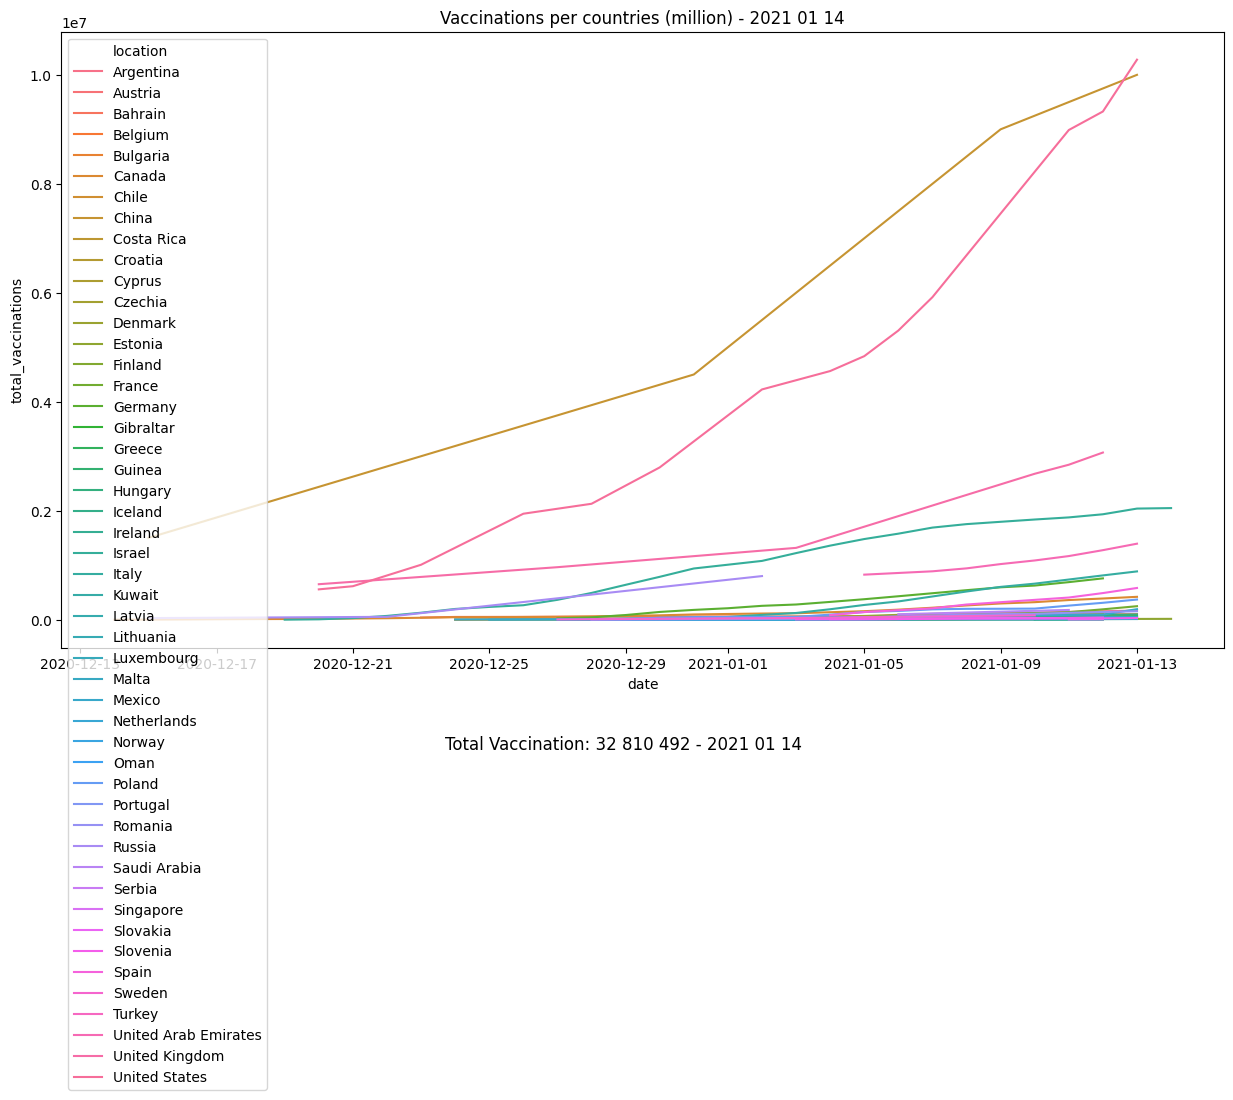

In [11]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


In [12]:
allCountriesFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 472
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 453 non-null    object        
 1   date                     453 non-null    datetime64[ns]
 2   vaccine                  453 non-null    object        
 3   source_url               453 non-null    object        
 4   total_vaccinations       453 non-null    int64         
 5   people_vaccinated        449 non-null    float64       
 6   people_fully_vaccinated  453 non-null    int64         
 7   iso_code                 453 non-null    object        
 8   vaccines                 453 non-null    object        
 9   last_observation_date    453 non-null    object        
 10  source_name              453 non-null    object        
 11  source_website           453 non-null    object        
 12  _merge                   453 non-nul

In [13]:
# Resample dates Forward filling and sum

#allCountriesFiltered
#grouper = allCountriesFiltered.groupby([pd.Grouper(key="date",freq='1D'), 'location']).mean() 


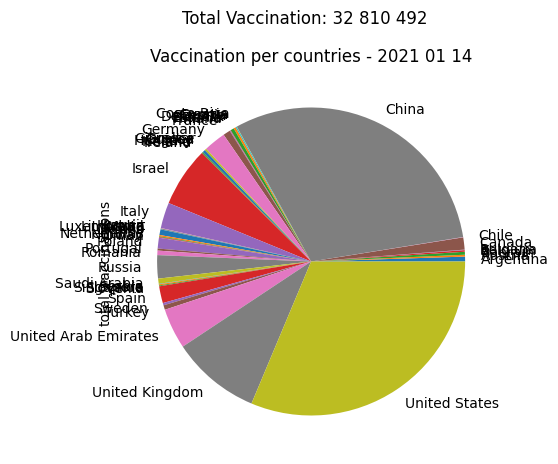

In [14]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [15]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=False)

,total_vaccinations,vaccine,iso_code
location,,,
United States,10278462,"Moderna, Pfizer/BioNTech",USA
China,10000000,"CNBG, Sinovac",CHN
United Kingdom,3067541,"Oxford/AstraZeneca, Pfizer/BioNTech",GBR
Israel,2047880,Pfizer/BioNTech,ISR
United Arab Emirates,1394580,"Pfizer/BioNTech, Sinopharm",ARE
Italy,885814,Pfizer/BioNTech,ITA
Russia,800000,Sputnik V,RUS
Germany,758093,"Moderna, Pfizer/BioNTech",DEU
Spain,581638,Pfizer/BioNTech,ESP


In [16]:
plotLatestCountries.shape

(49, 3)

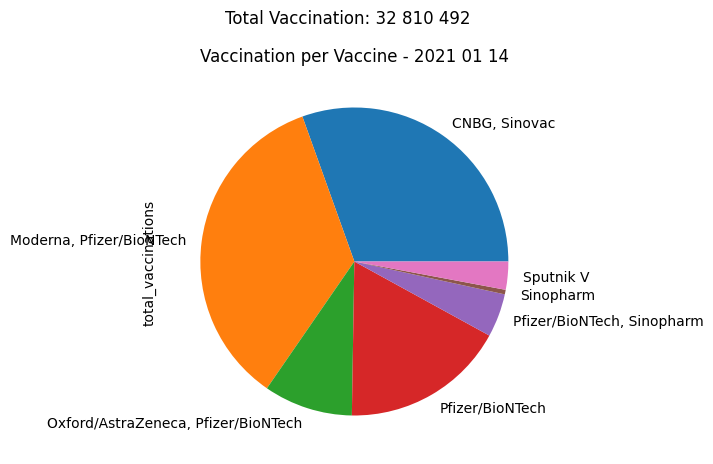

In [17]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [18]:
plotVaccine.sort_values(ascending=True)

vaccine
Sinopharm                                157451
Sputnik V                                966858
Pfizer/BioNTech, Sinopharm              1495943
Oxford/AstraZeneca, Pfizer/BioNTech     3067541
Pfizer/BioNTech                         5666935
CNBG, Sinovac                          10000000
Moderna, Pfizer/BioNTech               11455764
Name: total_vaccinations, dtype: int64

In [19]:
# Sweden have 10 000 doses....
#allCountries

In [20]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-14 13:04:55.461967
Time elapsed (hh:mm:ss.ms) 0:00:17.411255


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [21]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sp8
# see also https://www.wikidata.org/wiki/Wikidata:Project_chat#Brexit_in_Wikidata
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita
?G20 ?IMF (sample(?genderH) AS ?genderH)
WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1 }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita }
  ?cid wdt:P6/wdt:P21 ?gHead # gender head of gov
  BIND (exists{?cid wdt:P463 wd:Q458} && not exists{?cid p:P463 [ ps:P463 wd:Q458 ; pq:P582 [] ]} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q19771} && not exists{?cid p:P463 [ ps:P463 wd:Q19771 ; pq:P582 [] ]} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q7804} && not exists{?cid p:P463 [ ps:P463 wd:Q7804 ; pq:P582 [] ]} AS ?IMF)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
    ?gHead rdfs:label ?genderH.
    FILTER((LANG(?genderH)) = "en")

  }
FILTER ( ?cid  not in ( wd:Q756617 ) ) #Danish Realm
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid 
 ?G20 ?IMF """


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cid                  194 non-null    object
 1   continent            194 non-null    object
 2   memberEU             194 non-null    object
 3   country              194 non-null    object
 4   qid                  194 non-null    object
 5   population           194 non-null    object
 6   ISO3166_1            194 non-null    object
 7   nominalGDPperCapita  191 non-null    object
 8   G20                  194 non-null    object
 9   IMF                  194 non-null    object
 10  genderH              194 non-null    object
dtypes: object(11)
memory usage: 16.8+ KB


In [22]:
WDpopulation.sample(5)

,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH
124,http://www.wikidata.org/entity/Q683,Oceania,false,Samoa,Q683,196440,WSM,4280,false,false,male
82,http://www.wikidata.org/entity/Q813,Asia,false,Kyrgyzstan,Q813,6201500,KGZ,1220,false,false,male
71,http://www.wikidata.org/entity/Q766,North America,false,Jamaica,Q766,2890299,JAM,5114,false,false,male
120,http://www.wikidata.org/entity/Q1014,Africa,false,Liberia,Q1014,4731906,LBR,694,false,false,male
156,http://www.wikidata.org/entity/Q222,Europe,false,Albania,Q222,3020209,ALB,4537,false,false,male


In [23]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Argentina,166833,Sputnik V,ARG
Austria,63280,Pfizer/BioNTech,AUT
Bahrain,101363,"Pfizer/BioNTech, Sinopharm",BHR
Belgium,55740,Pfizer/BioNTech,BEL
Bulgaria,17038,Pfizer/BioNTech,BGR
Canada,419209,"Moderna, Pfizer/BioNTech",CAN
Chile,10699,Pfizer/BioNTech,CHL
China,10000000,"CNBG, Sinovac",CHN
Costa Rica,9751,Pfizer/BioNTech,CRI


In [24]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,country,qid,population,ISO3166_1,nominalGDPperCapita,G20,IMF,genderH,_merge
0,166833,Sputnik V,ARG,http://www.wikidata.org/entity/Q414,South America,false,Argentina,Q414,44938712,ARG,14398,true,false,male,both
1,63280,Pfizer/BioNTech,AUT,http://www.wikidata.org/entity/Q40,Europe,true,Austria,Q40,8809212,AUT,44920,false,false,male,both
2,101363,"Pfizer/BioNTech, Sinopharm",BHR,http://www.wikidata.org/entity/Q398,Asia,false,Bahrain,Q398,1492584,BHR,23739,false,false,male,both
3,55740,Pfizer/BioNTech,BEL,http://www.wikidata.org/entity/Q31,Europe,true,Belgium,Q31,11431406,BEL,43467,false,false,male,both
4,17038,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,Bulgaria,Q219,7000039,BGR,8228,false,false,male,both
5,419209,"Moderna, Pfizer/BioNTech",CAN,http://www.wikidata.org/entity/Q16,North America,false,Canada,Q16,37894799,CAN,44870,true,false,male,both
6,10699,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,Chile,Q298,18054726,CHL,15346,false,false,male,both
7,10000000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,People's Republic of China,Q148,1409517397,CHN,8826,true,false,male,both
8,9751,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,Costa Rica,Q800,4905769,CRI,11677,false,false,male,both
9,34553,Pfizer/BioNTech,HRV,http://www.wikidata.org/entity/Q224,Europe,true,Croatia,Q224,4105493,HRV,13386,false,false,male,both


In [25]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
# G20 IMF
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)
CountriesData['genderFlag'] = CountriesData['genderH']
CountriesData["genderFlag"].replace({"male": "1", "female": "0"}, inplace=True)
CountriesData['genderFlag'] = CountriesData['genderFlag'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   total_vaccinations   48 non-null     int64   
 1   vaccine              48 non-null     object  
 2   iso_code             48 non-null     object  
 3   cid                  48 non-null     object  
 4   continent            48 non-null     object  
 5   memberEU             48 non-null     int64   
 6   country              48 non-null     object  
 7   qid                  48 non-null     object  
 8   population           48 non-null     int64   
 9   ISO3166_1            48 non-null     object  
 10  nominalGDPperCapita  47 non-null     float64 
 11  G20                  48 non-null     int64   
 12  IMF                  48 non-null     int64   
 13  genderH              48 non-null     object  
 14  _merge               48 non-null     category
 15  genderFlag           48 n

In [26]:
#CountriesData

In [27]:
CountriesData['Country'] = CountriesData.index

In [28]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.297923
population                         0.803177
nominalGDPperCapita                0.064476
G20                                0.444758
IMF                               -0.001569
genderFlag                         0.109834
Country                            0.132201
vaccinations_population_percent    0.191015
Name: total_vaccinations, dtype: float64

In [29]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.191015
memberEU                          -0.258141
population                        -0.037293
nominalGDPperCapita                0.136074
G20                               -0.073539
IMF                               -0.037241
genderFlag                         0.080374
Country                            0.113185
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [30]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


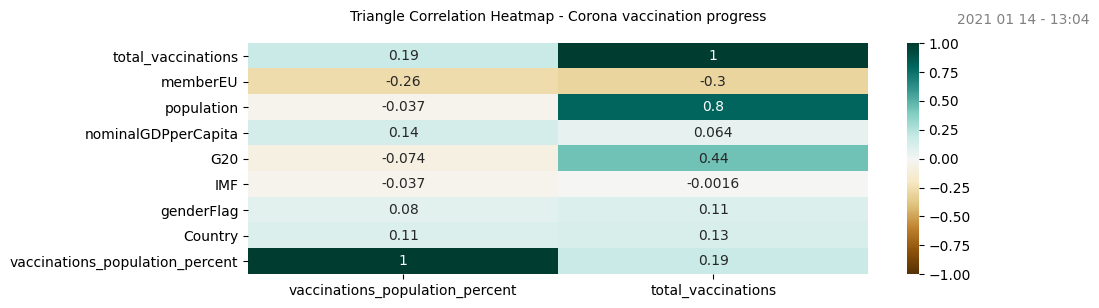

In [31]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [32]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G20","IMF","country"}]

,memberEU,population,vaccinations_population_percent,country,G20,IMF,total_vaccinations,continent
22,0,9093000,22.521500,Israel,0,0,2047880,Asia
45,0,9400145,14.835729,United Arab Emirates,0,0,1394580,Asia
2,0,1492584,6.791109,Bahrain,0,0,101363,Asia
46,0,66022273,4.646221,United Kingdom,1,0,3067541,Europe
47,0,328239523,3.131391,United States of America,1,0,10278462,North America
12,1,5827463,2.026148,Denmark,0,0,118073,Europe
23,1,60317000,1.468598,Italy,1,1,885814,Europe
41,1,2066880,1.430223,Slovenia,0,0,29561,Europe
20,0,357050,1.365355,Iceland,0,0,4875,Europe
42,1,46733038,1.244597,Spain,0,0,581638,Europe


## Vaccination numbers % of population

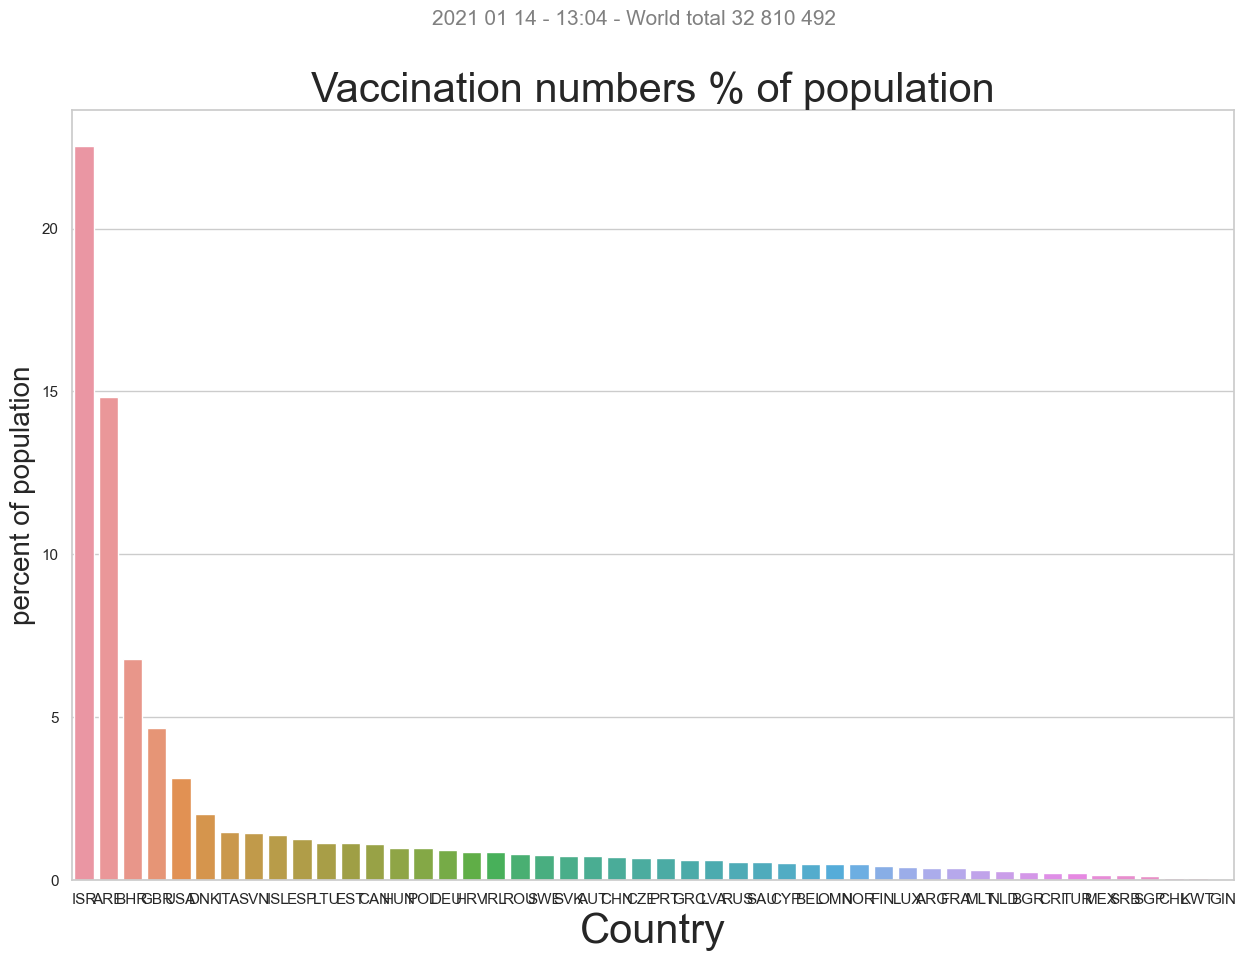

In [33]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

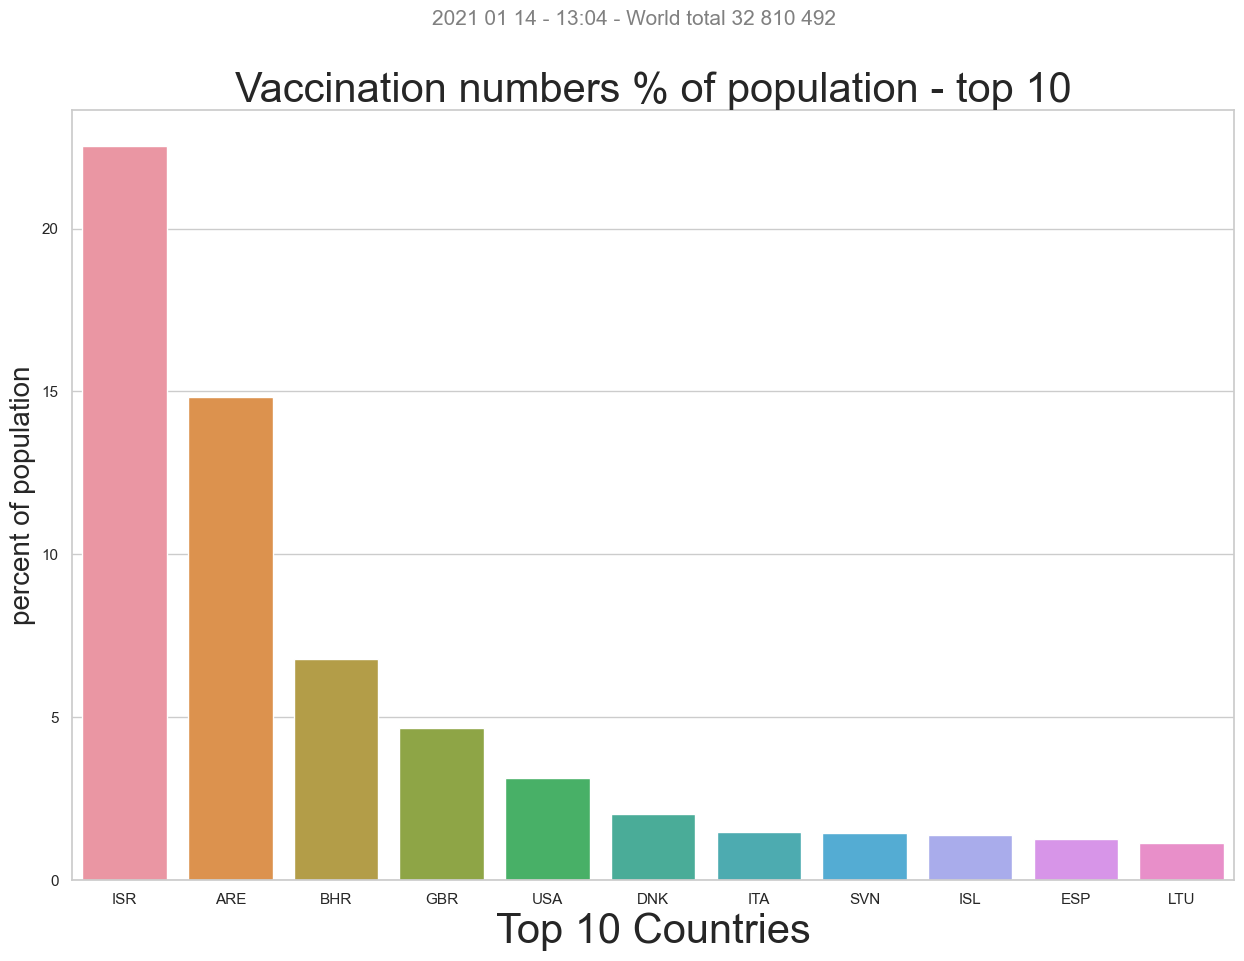

In [34]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:11]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

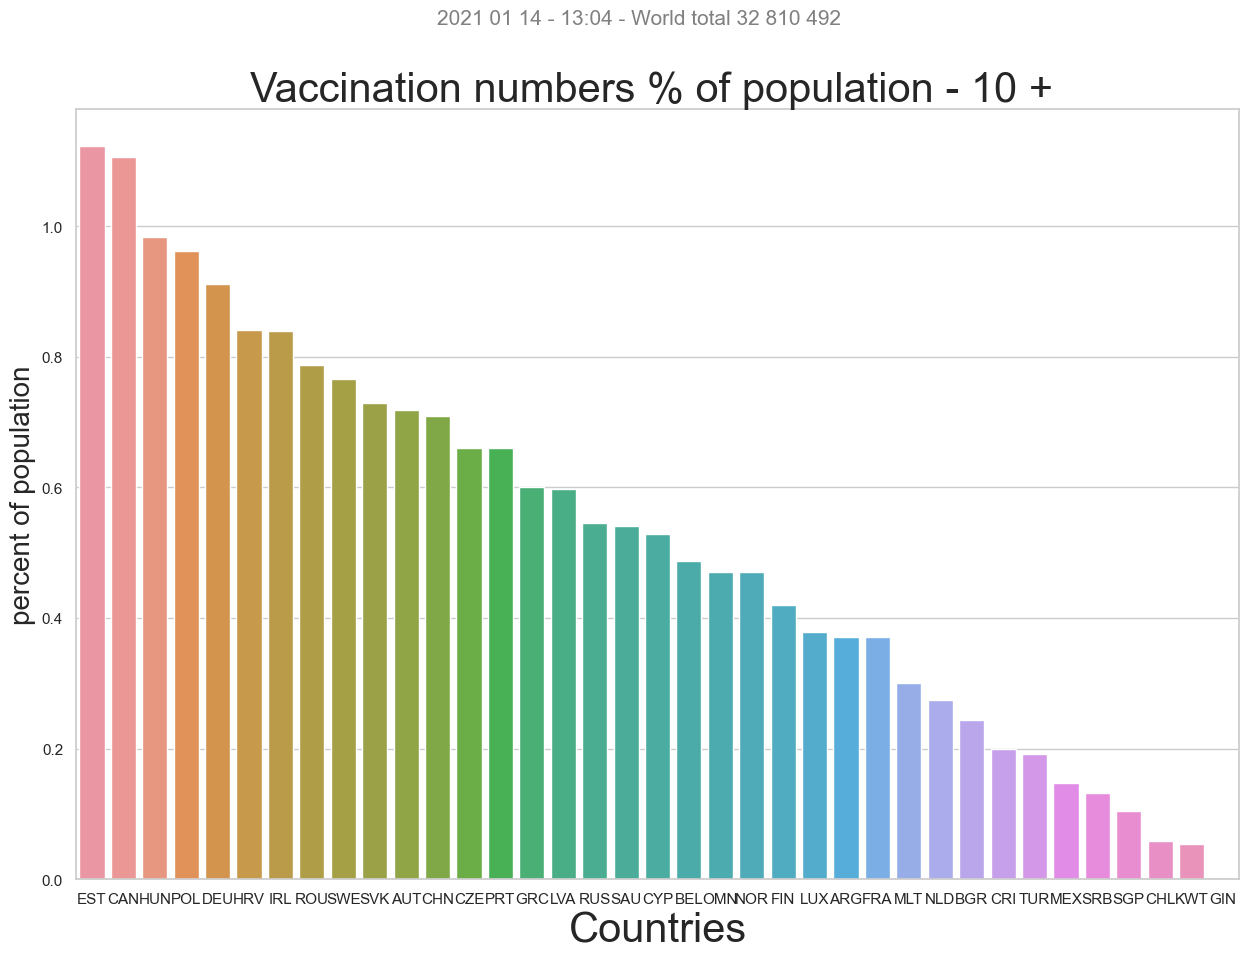

In [35]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[11:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

## Scatter plots

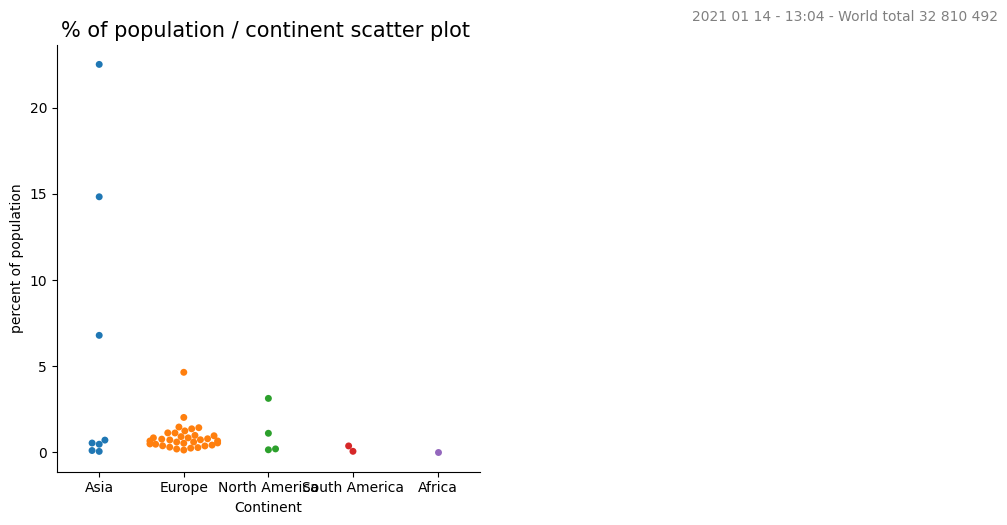

In [36]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

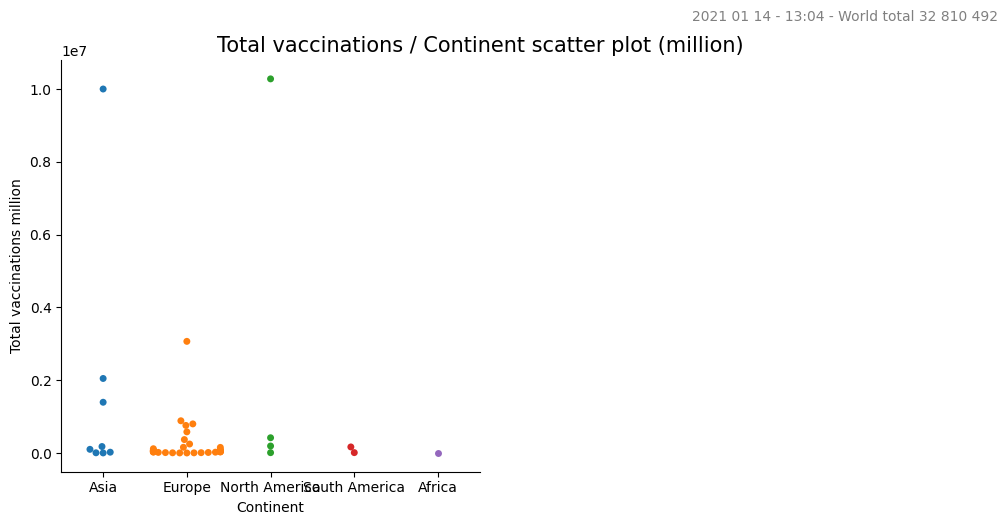

In [37]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [38]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

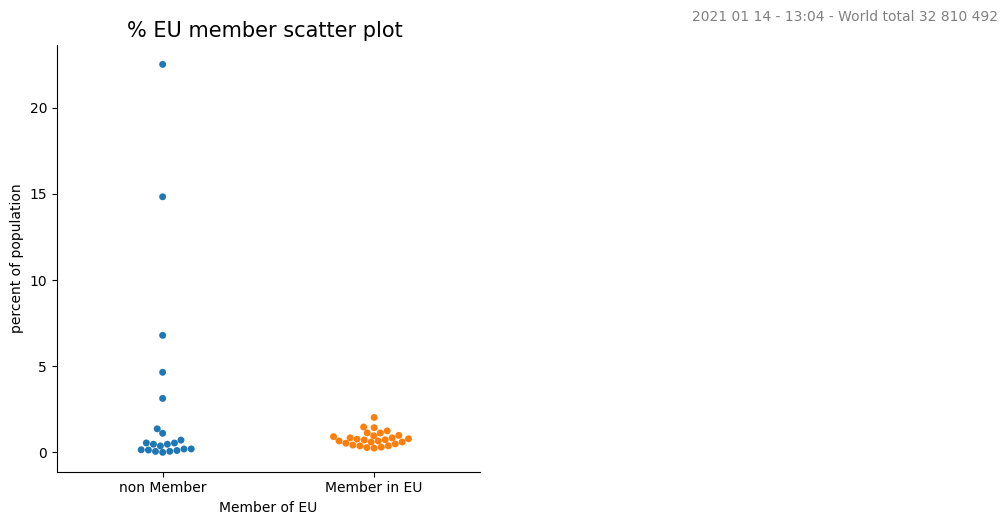

In [39]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

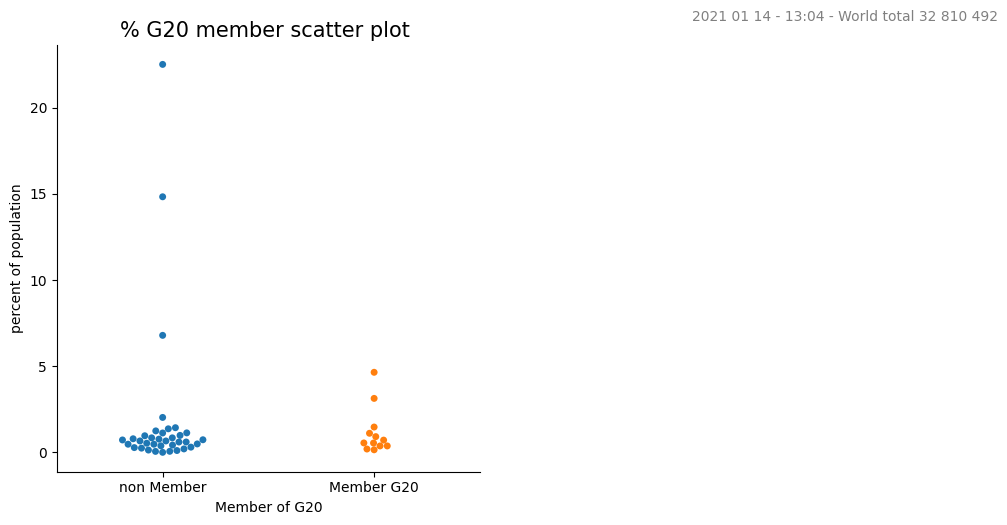

In [40]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

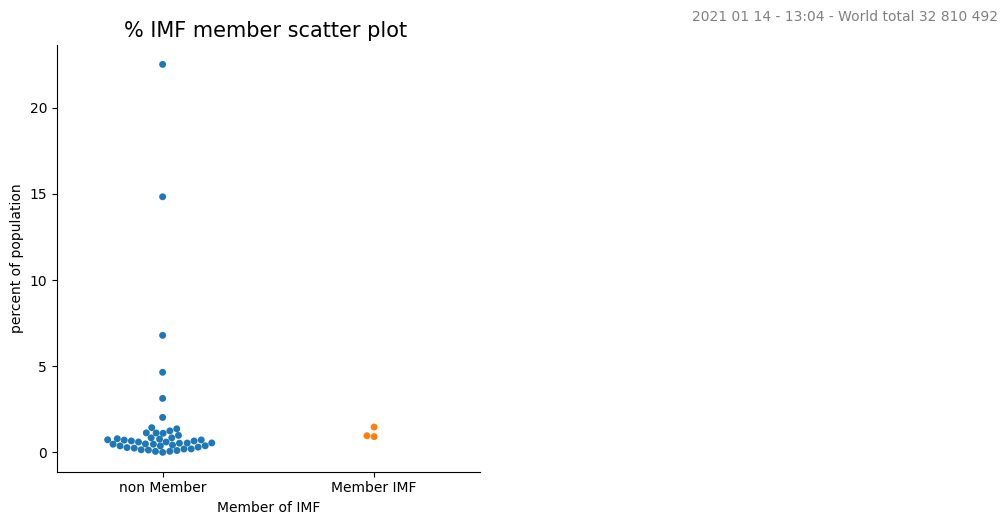

In [41]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [42]:
CountriesDataEurope = CountriesData[CountriesData["continent"] == "Europe"]
europetotal_vaccinations_str = europetotal_vaccinations_str = '{:,}'.format(CountriesDataEurope.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape,europetotal_vaccinations_str)


32 810 492 (49, 3) 7 976 836


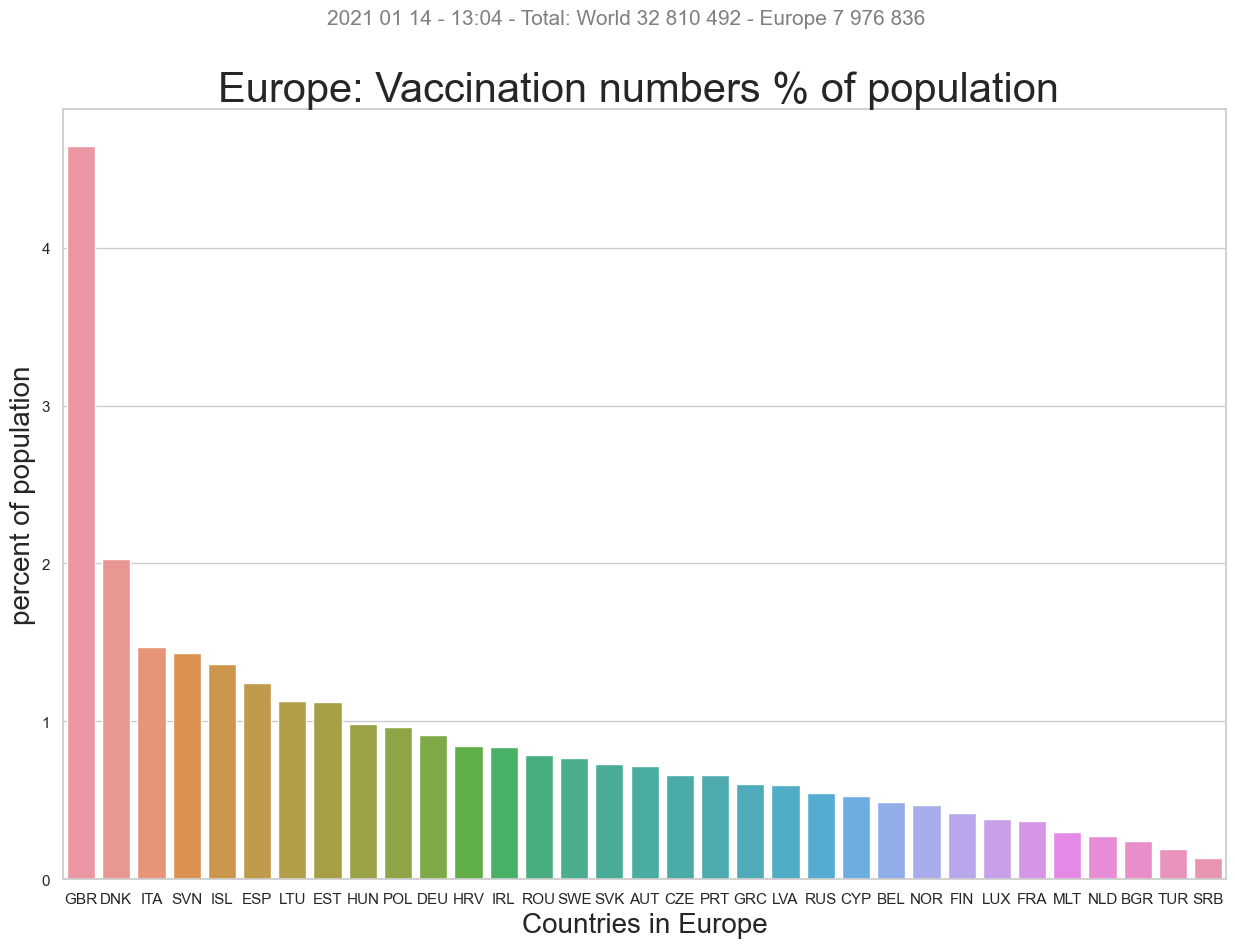

In [43]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesDataEurope). \
            set_title("Europe: Vaccination numbers % of population ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountryPopulation.png",bbox_inches="tight")
plt.show() 

In [44]:
#CountriesDataEurope

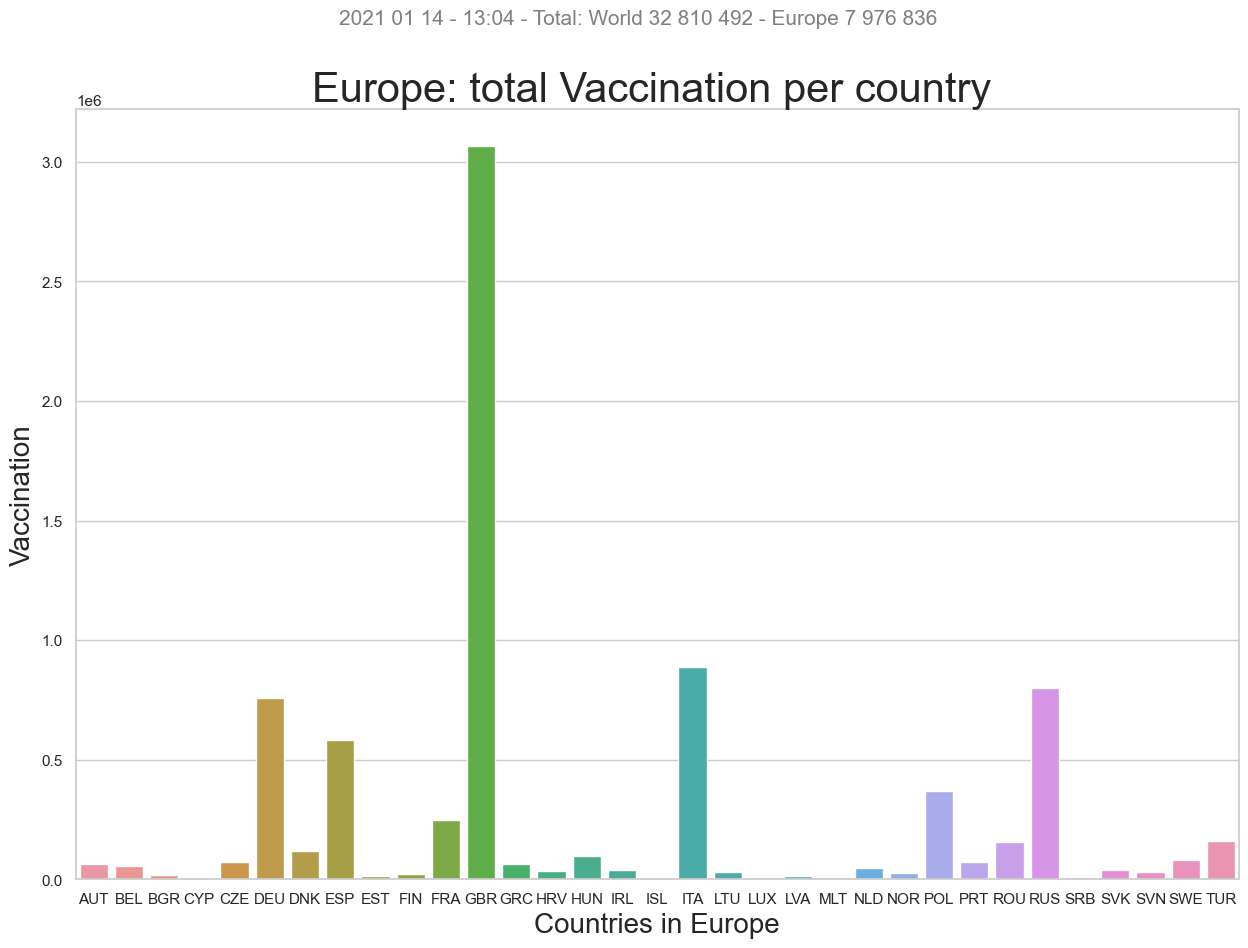

In [45]:
CountriesDataEurope = CountriesDataEurope.sort_values(by=['iso_code'],ascending=True)
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEurope). \
            set_title("Europe: total Vaccination per country ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("Countries in Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
plt.savefig("images/Corona_EuropeVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [46]:
#All countries Europe also no reporting
WDpopulationEurope = WDpopulation[WDpopulation["continent"] == "Europe"]
 
#CountriesDataEuropeAll = CountriesDataEurope
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1")  
CountriesDataEuropeAll = pd.merge(WDpopulationEurope,CountriesDataEurope,how='outer',on="ISO3166_1") \
        [{"memberEU_x","country_x","ISO3166_1","total_vaccinations","vaccinations_population_percent","genderH_x"}]

CountriesDataEuropeAll['total_vaccinations'] = CountriesDataEuropeAll['total_vaccinations'].fillna(0)
CountriesDataEuropeAll['vaccinations_population_percent'] = CountriesDataEuropeAll['vaccinations_population_percent'].fillna(0)
CountriesDataEuropeAll = CountriesDataEuropeAll.sort_values(by=['ISO3166_1'],ascending=True)
#CountriesDataEuropeAll["Member EU"] = CountriesDataEuropeAll["Member EU"].fillna("non Member")
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll["memberEU_x"].replace({"true": "Member in EU", "false": "non Member"}, inplace=True)
CountriesDataEuropeAll.rename(columns = {'memberEU_x': 'memberEU'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'genderH_x': 'head_gender'}, inplace = True)
# name change 
CountriesDataEuropeAll
#CountriesDataEurope
#WDpopulationEurope 
#CountriesDataEurope

,ISO3166_1,vaccinations_population_percent,memberEU,country_x,head_gender,total_vaccinations
35,ALB,0.000000,non Member,Albania,male,0.0
9,AND,0.000000,non Member,Andorra,male,0.0
24,ARM,0.000000,non Member,Armenia,male,0.0
7,AUT,0.718339,Member in EU,Austria,male,63280.0
28,AZE,0.000000,non Member,Azerbaijan,male,0.0
23,BEL,0.487604,Member in EU,Belgium,male,55740.0
21,BGR,0.243399,Member in EU,Bulgaria,male,17038.0
31,BIH,0.000000,non Member,Bosnia and Herzegovina,male,0.0
38,BLR,0.000000,non Member,Belarus,male,0.0
3,CHE,0.000000,non Member,Switzerland,male,0.0


## All countries on continent Europe

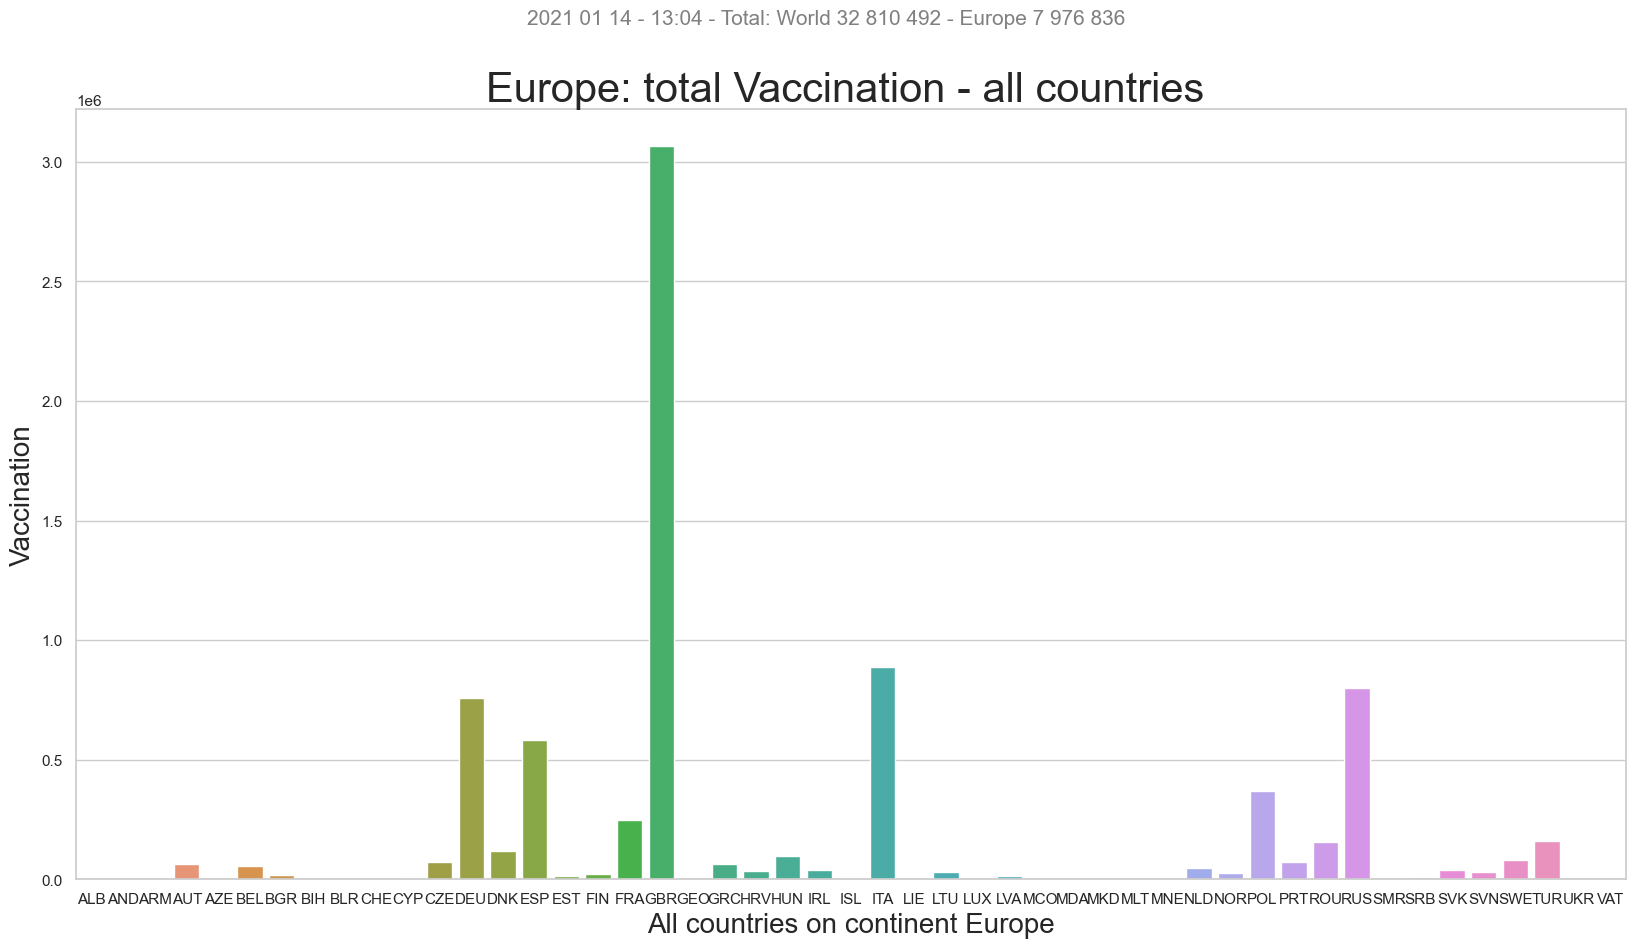

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "total_vaccinations", data=CountriesDataEuropeAll). \
            set_title("Europe: total Vaccination - all countries ", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All countries on continent Europe",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/Corona_EuropeAllVaccinationperCountry.png",bbox_inches="tight")
plt.show() 

In [48]:
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 35 to 11
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3166_1                        49 non-null     object 
 1   vaccinations_population_percent  49 non-null     float64
 2   memberEU                         49 non-null     object 
 3   country_x                        49 non-null     object 
 4   head_gender                      49 non-null     object 
 5   total_vaccinations               49 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.9+ KB


In [49]:
CountriesDataEuropeAll


,ISO3166_1,vaccinations_population_percent,memberEU,country_x,head_gender,total_vaccinations
35,ALB,0.000000,non Member,Albania,male,0.0
9,AND,0.000000,non Member,Andorra,male,0.0
24,ARM,0.000000,non Member,Armenia,male,0.0
7,AUT,0.718339,Member in EU,Austria,male,63280.0
28,AZE,0.000000,non Member,Azerbaijan,male,0.0
23,BEL,0.487604,Member in EU,Belgium,male,55740.0
21,BGR,0.243399,Member in EU,Bulgaria,male,17038.0
31,BIH,0.000000,non Member,Bosnia and Herzegovina,male,0.0
38,BLR,0.000000,non Member,Belarus,male,0.0
3,CHE,0.000000,non Member,Switzerland,male,0.0


### Countries in EU

In [50]:
#CountriesDataEuropeEU[CountriesDataEuropeEU["ISO3166_1"] == "RUS"]
#CountriesDataEuropeEU
CountriesDataEuropeAll.rename(columns = {'country_x': 'country'}, inplace = True)
CountriesDataEuropeAll.rename(columns = {'ISO3166_1': 'ISO3166-1'}, inplace = True)

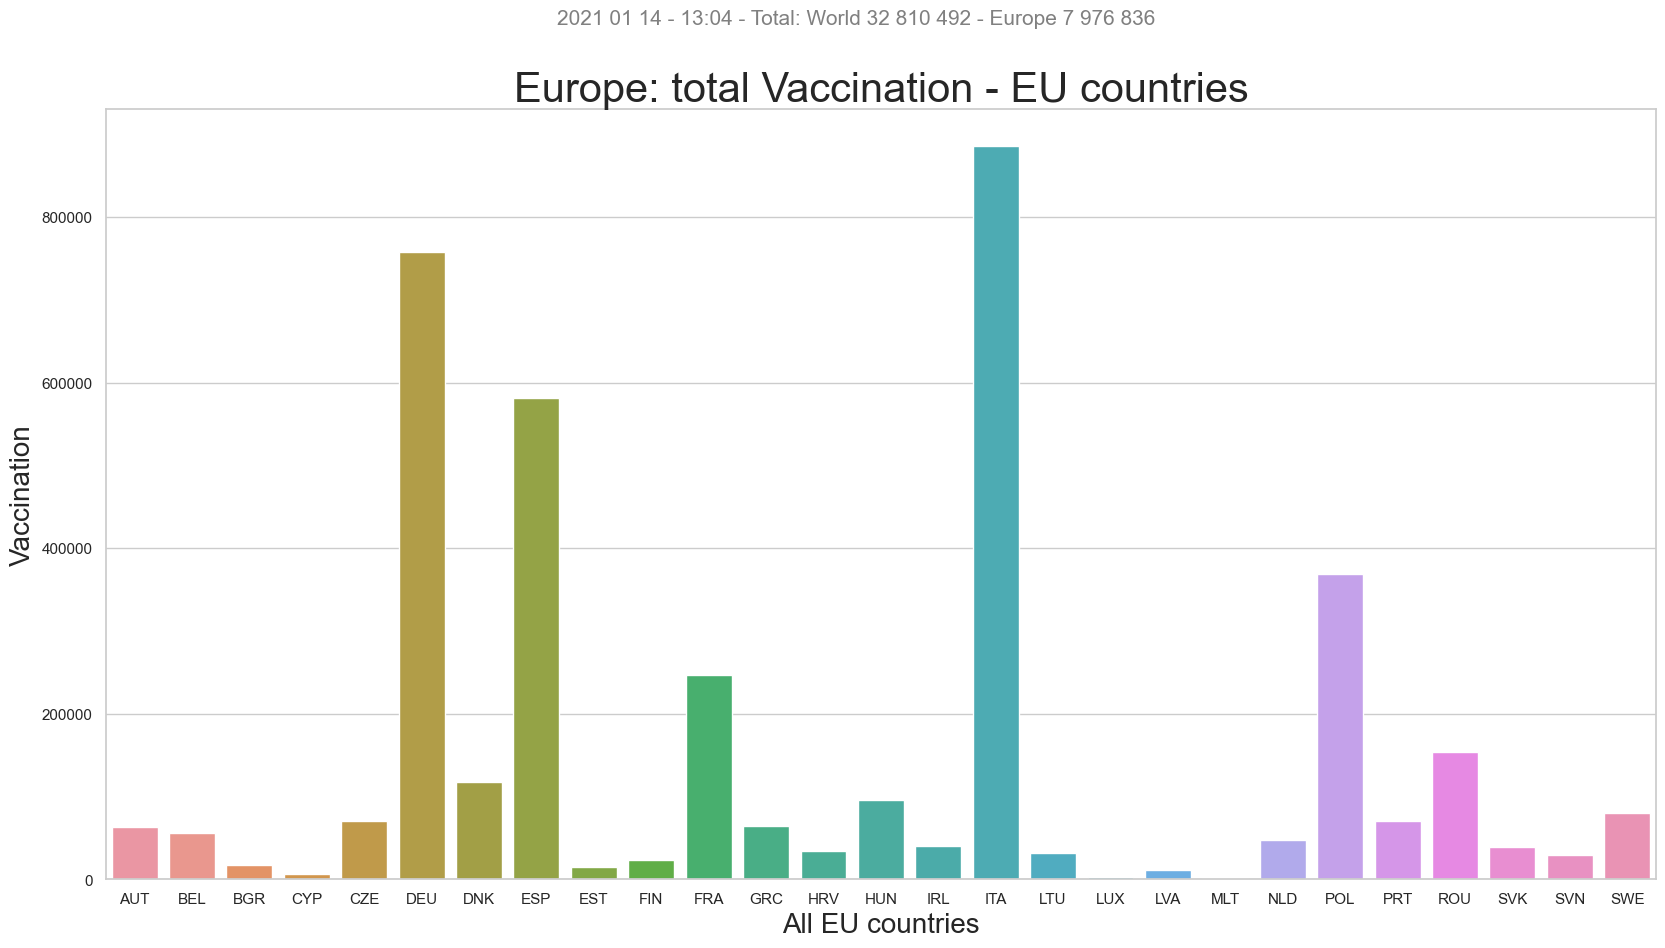

In [51]:
CountriesDataEuropeEU = CountriesDataEuropeAll[CountriesDataEuropeAll["memberEU"] == "Member in EU"]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "total_vaccinations", data=CountriesDataEuropeEU). \
            set_title("Europe: total Vaccination - EU countries", \
                      fontsize=30)
plt.ylabel("Vaccination",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')
#plt.annotate('actual group', xy=(x+0.2,y), xytext=(x+0.3, 300),
#             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
#for p in ax.patches:
#    print(p)

plt.savefig("images/EU_VaccinationperCountry.png",bbox_inches="tight")
plt.show()

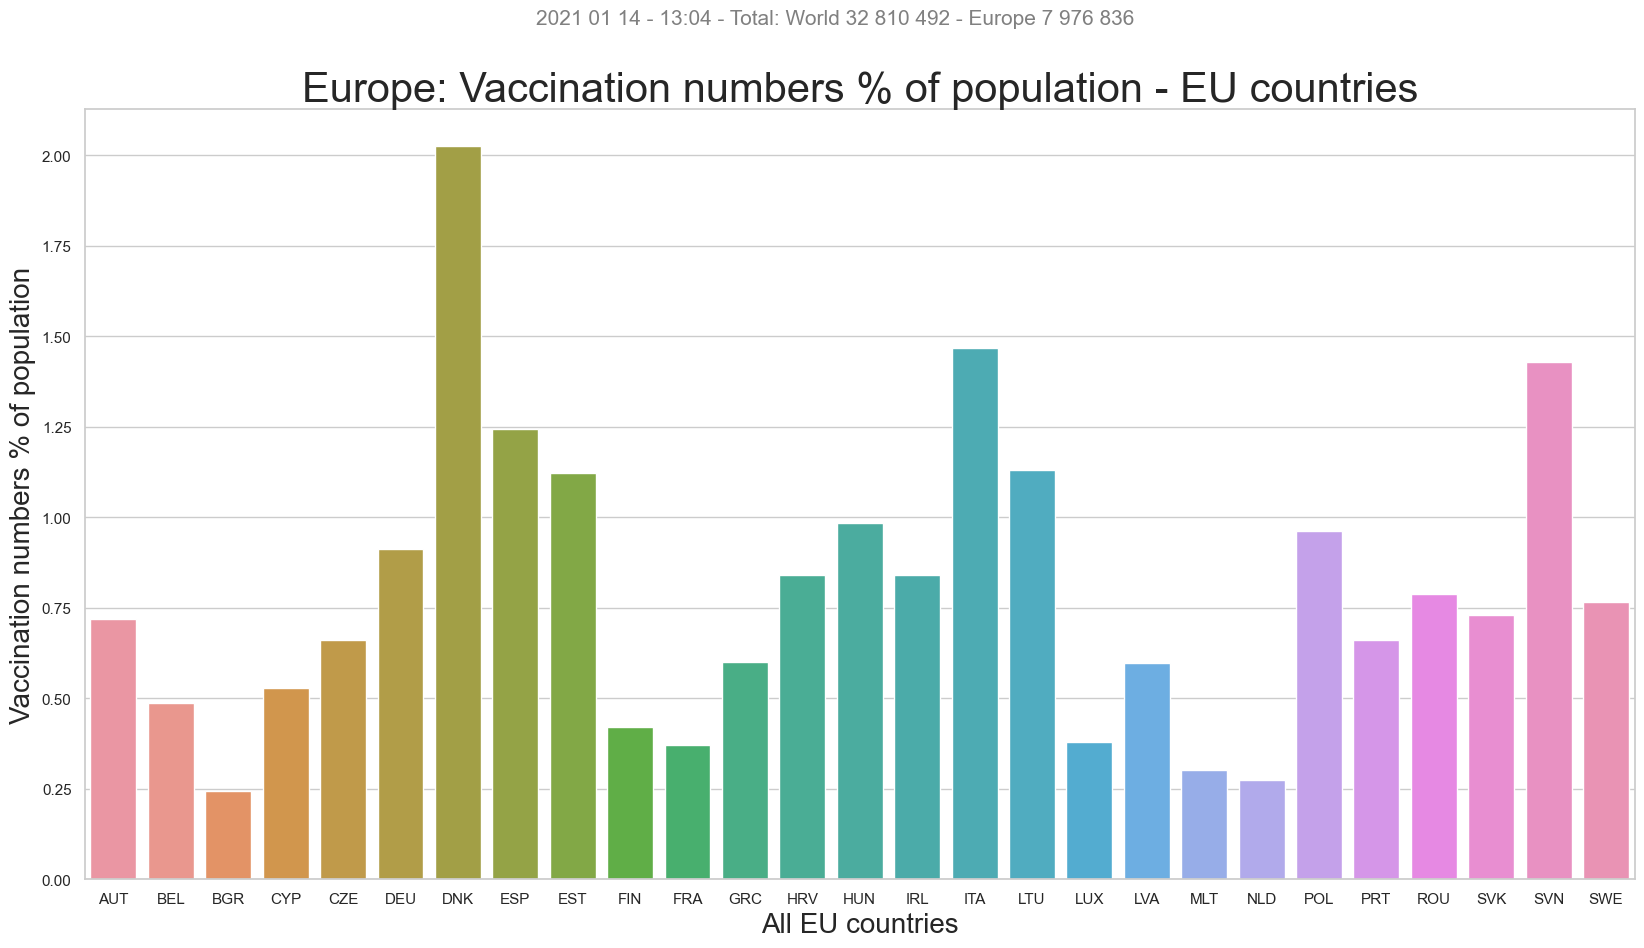

In [52]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166-1",y = "vaccinations_population_percent", data=CountriesDataEuropeEU). \
            set_title("Europe: Vaccination numbers % of population - EU countries", \
                      fontsize=30)
style = dict(size=10, color='gray')

plt.ylabel("Vaccination numbers % of population",fontsize=20)
plt.xlabel("All EU countries",fontsize=20)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=15,color = 'gray')

plt.savefig("images/EU_PercentVaccinationperCountry.png",bbox_inches="tight")
plt.show()

In [53]:
CountriesDataEuropeEU
#WDpopulationEuropeEU

,ISO3166-1,vaccinations_population_percent,memberEU,country,head_gender,total_vaccinations
7,AUT,0.718339,Member in EU,Austria,male,63280.0
23,BEL,0.487604,Member in EU,Belgium,male,55740.0
21,BGR,0.243399,Member in EU,Bulgaria,male,17038.0
36,CYP,0.528845,Member in EU,Cyprus,male,6035.0
41,CZE,0.660935,Member in EU,Czech Republic,male,70680.0
30,DEU,0.911725,Member in EU,Germany,female,758093.0
13,DNK,2.026148,Member in EU,Denmark,female,118073.0
0,ESP,1.244597,Member in EU,Spain,male,581638.0
43,EST,1.123096,Member in EU,Estonia,male,14879.0
8,FIN,0.420393,Member in EU,Finland,female,23126.0


### Countries in EU not delivering Vaccination statistics

In [54]:
CountriesDataEuropeAll[(CountriesDataEuropeAll["memberEU"] == "Member in EU") & \
(CountriesDataEuropeAll["total_vaccinations"] == 0 )][{"total_vaccinations","country","ISO3166-1","memberEU"}]

,memberEU,ISO3166-1,country,total_vaccinations


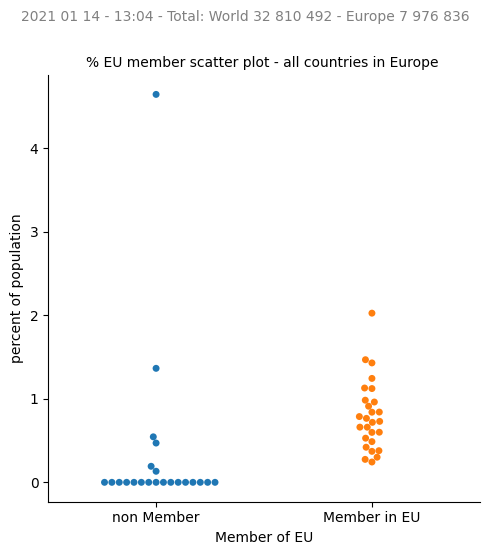

In [55]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="memberEU", y="vaccinations_population_percent", data=CountriesDataEuropeAll,kind="swarm",legend='brief')
plt.title("% EU member scatter plot - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_VaccinationperPopulation_AllEurope_scatterplot.png",bbox_inches="tight")
plt.show() 

In [56]:
#CountriesDataEuropeAll["head_gender"].astype('string')  
CountriesDataEuropeAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 35 to 11
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ISO3166-1                        49 non-null     object 
 1   vaccinations_population_percent  49 non-null     float64
 2   memberEU                         49 non-null     object 
 3   country                          49 non-null     object 
 4   head_gender                      49 non-null     object 
 5   total_vaccinations               49 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.9+ KB


In [57]:
#CountriesDataEuropeAll["vaccinations_population_percent].value_counts()

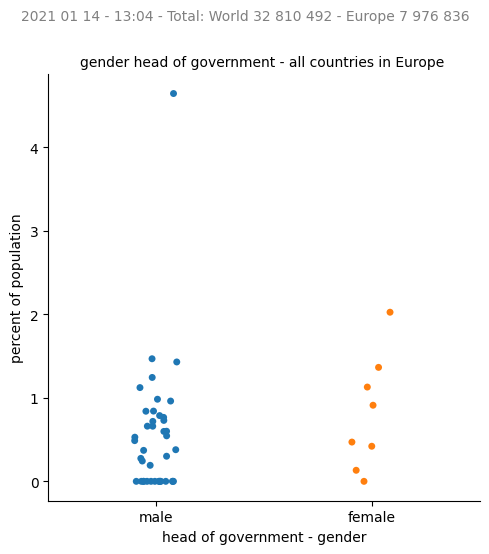

In [58]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="vaccinations_population_percent", data=CountriesDataEuropeAll)
plt.title("gender head of government - all countries in Europe ",fontsize=10)
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_percent_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

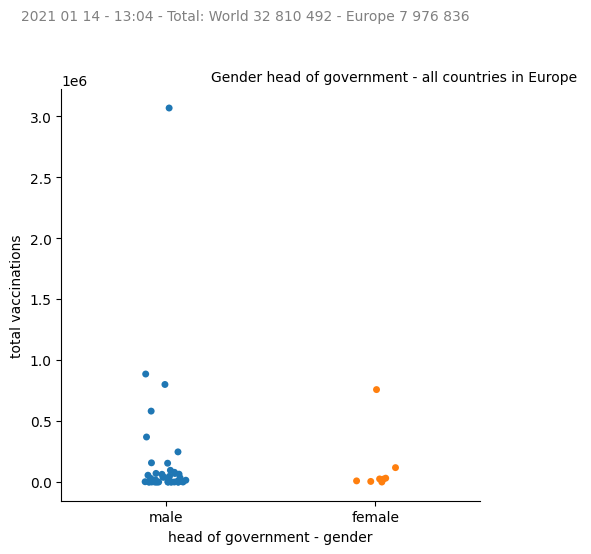

In [59]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="head_gender", y="total_vaccinations", data=CountriesDataEuropeAll)
plt.title("Gender head of government - all countries in Europe ",fontsize=10,x=0.8)
plt.ylabel("total vaccinations",fontsize=10)
plt.xlabel("head of government - gender",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - Total: World ' + worldtotal_vaccinations_str) + 
             " - Europe " + europetotal_vaccinations_str 
             ,fontsize=10,color = 'gray', y=1.1)

plt.savefig("images/Corona_AllEurope_gender_scatterplot.png",bbox_inches="tight")
plt.show() 

In [60]:
print(worldtotal_vaccinations_str, plotLatestCountries.shape, europetotal_vaccinations_str, CountriesDataEurope.shape)

32 810 492 (49, 3) 7 976 836 (33, 21)


In [61]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2021-01-14 13:05:11.478382
Time elapsed (hh:mm:ss.ms) 0:00:33.427772


In [62]:
#The Global State of Democracy Indices
#stata_democracy_indices = "https://www.idea.int/gsod-indices/sites/default/files/gsodi_pv_4.dta"
#df = pd.read_stata(stata_democracy_indices)